In [65]:
# Importujeme kniznice
import pandas as pd
import numpy as np

# Generovanie dat

In [21]:
names = [
	"Iron Man",
	"Thor",
	"Ant-Man",
	"Wasp",
	"Hulk",
	"Captain America",
	"Hawkeye",
	"Quicksilver",
	"Scarlet Witch",
	"Swordsman",
	"Hercules",
	"Black Panther",
	"Vision",
	"Black Knight",
	"Black Widow",
	"Mantis",
	"Beast",
	"Moondragon",
	"Hellcat",
	"Two-Gun Kid",
	"Wonder Man",
	"Thing",
	"Human Torch",
	"Spider-Man",
	"Sandman",
	"Justice",
	"Wolverine",
	"Doctor Strange",
	"Daredevil",
    "Gandalf",
    "Sheldon Cooper"
]

data = {
	'Name': names
}

df = pd.DataFrame(columns=['Name', 'Height', 'Weight', 'BMI'], data=data)
df['Height'] = np.random.randint(low=160, high=220, size=(len(df.index),1)) / 100
df['Weight'] = np.random.randint(low=50, high=140, size=(len(df.index),1))

df.info()  # dataframe info

# df.iloc[5:10, :]

df

# df.to_csv("bmi.csv")

df = None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
Name      31 non-null object
Height    31 non-null float64
Weight    31 non-null int64
BMI       0 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ KB


# Importovanie dat a praca s Pandas

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Thor to Sheldon Cooper
Data columns (total 2 columns):
Height    27 non-null float64
Weight    28 non-null float64
dtypes: float64(2)
memory usage: 720.0+ bytes


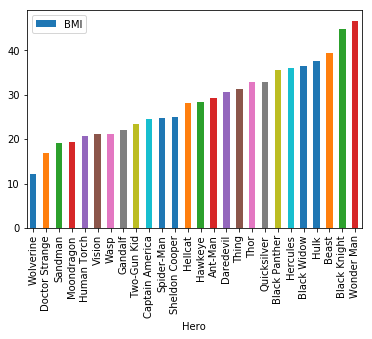

In [84]:
df = pd.read_csv('../data/avengers/bmi.csv', sep=';')

# df.info()

# Odstranim debilny stlpec
df = df.iloc[:, 1:]

# Pridam stlpce
df.columns = ['Hero', 'Height', 'Weight']

# Mam namiesto nevalidnych hodnot -1 a to nechcem
df = df.replace(-1, np.NaN)

# Moc sa mi nepaci prvy stlpec tak chcem vytvorit index podla mena
df = df.set_index(['Hero'])

# Kolko stlpcov nie je NULL
df.info()

# Pridam BMI
df['BMI'] = None

# Vypocitam BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Chcem sa zbavit nulovych zaznamov
df = df.dropna()

# Chcem zoradit svoje pole
df = df.sort_values(by=['BMI'])

# Kto ma namensie BMI?
df.head()

# Kto ma normalnu vahu?
normal_mask = (df['BMI'] > 18.5) & (df['BMI'] < 25)
df.loc[mask]

# Mozeme hned vyplut graf
df.plot.bar(y='BMI')